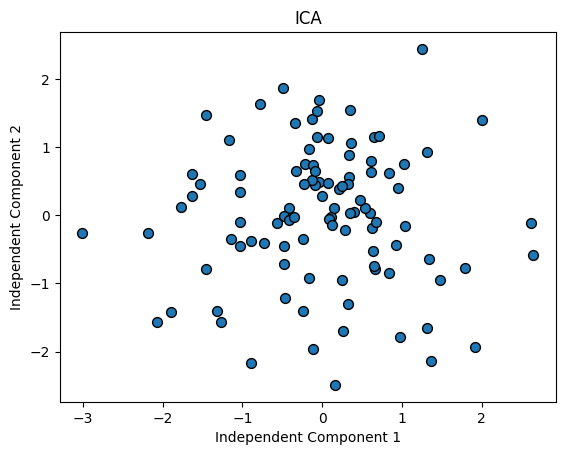

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Generate some data
np.random.seed(0)
X = np.random.randn(100, 5)

# ICA
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X)

# Plotting
plt.scatter(X_ica[:, 0], X_ica[:, 1], edgecolor='k', s=50)
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.title('ICA')
plt.show()

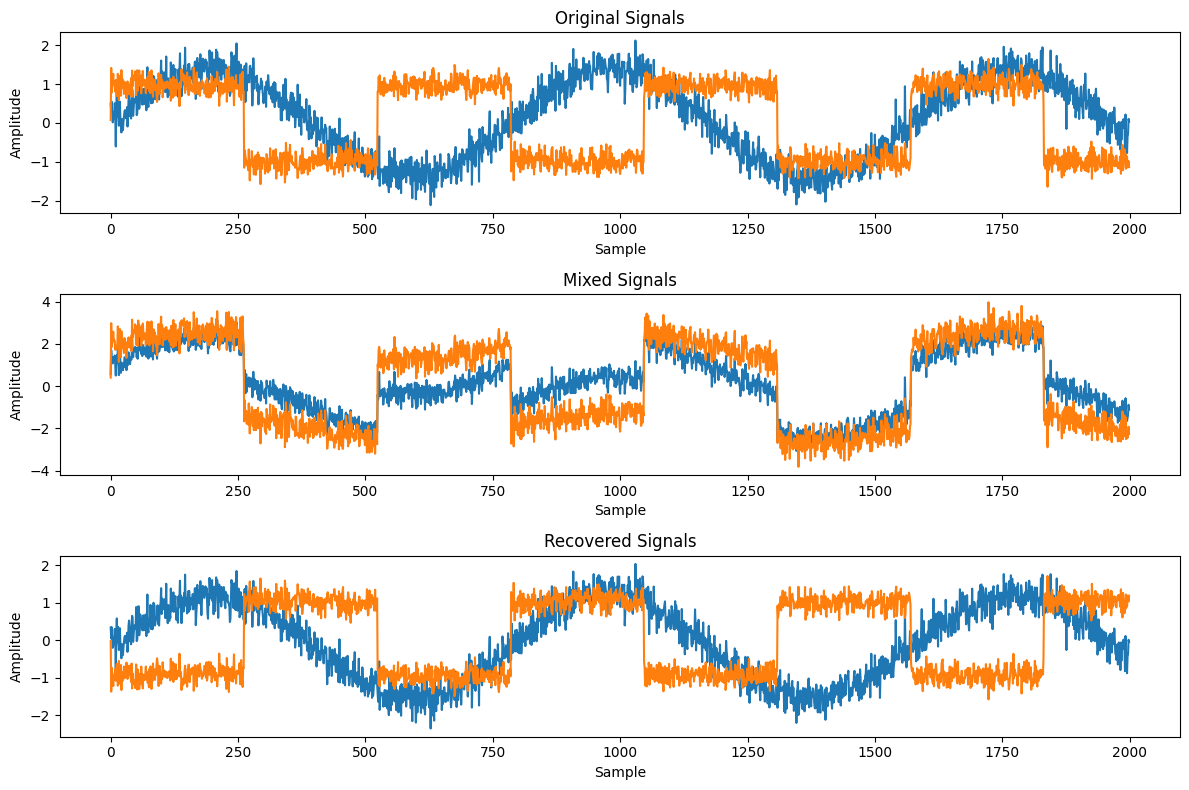

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Generate synthetic signals
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Create two sine waves with different frequencies
s1 = np.sin(2 * time)  # Signal 1: Sine wave
s2 = np.sign(np.sin(3 * time))  # Signal 2: Square wave

# Stack signals to form a (2, n_samples) matrix
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

# Standardize the data
S /= S.std(axis=0)

# Mix the signals
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Apply ICA
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title('Original Signals')
plt.plot(S)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.title('Mixed Signals')
plt.plot(X)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.title('Recovered Signals')
plt.plot(S_)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
